# PREDICTING HOMELESSNESS IN AMERICA


In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Feature Elimination and Modeling

In [6]:
df = pd.read_csv('data/features.csv')

In [7]:
df.head()

,Unnamed: 0,state,number,year,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,...,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,homeless_count,smha_per_cap,total_smha
0,0,alabama,AL-500,2007,845208,104742,3203,656,25480,1839,...,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,74.03,62570748.24
1,1,alabama,AL-500,2008,845208,105612,2172,976,25762,1722,...,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,79.39,67101063.12
2,2,alabama,AL-500,2009,845208,106482,1785,945,26244,1615,...,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2273,77.89,65833251.12
3,3,alabama,AL-500,2010,853551,107353,2486,1605,27098,1525,...,26.20,4.90,0.22,1.64,0.02,0.99,0.10,2273,78.19,66739152.69
4,4,alabama,AL-500,2011,862556,108846,3708,2257,27532,1459,...,26.95,4.82,0.23,1.80,0.02,1.10,0.16,1950,78.33,67564011.48


In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.isnull().any()

state                         False
number                        False
year                          False
population                    False
renter_occupied_households    False
eviction_filings              False
evictions                     False
total_ssi                     False
aged_ssi                      False
disbl_ssi                     False
18_und_ssi                    False
18_64_ssi                     False
65_ovr_ssi                    False
poverty_rate                  False
median_gross_rent             False
median_household_income       False
median_property_value         False
avg_rent_burden               False
eviction_rate                 False
eviction_filing_rate          False
unemploy_rate                 False
pct_renter_occupied           False
pct_white                     False
pct_af_am                     False
pct_hispanic                  False
pct_am_ind                    False
pct_asian                     False
pct_nh_pi                   

In [14]:
#encode states and cocs with label encoder
label_encoder = LabelEncoder()
label_encoder.fit(df.state)
df['state_code'] = label_encoder.transform(df.state)

label_encoder.fit(df.number)
df['coc'] = label_encoder.transform(df.number)

In [19]:
# keep a reference for the state and coc encoding

label_reference = df[['state','state_code','number', 'coc']]
#label_reference.to_csv('data/label_reference_table.csv')

In [21]:
#drop the state and number columns

df.drop(['state','number'],axis=1,inplace=True)

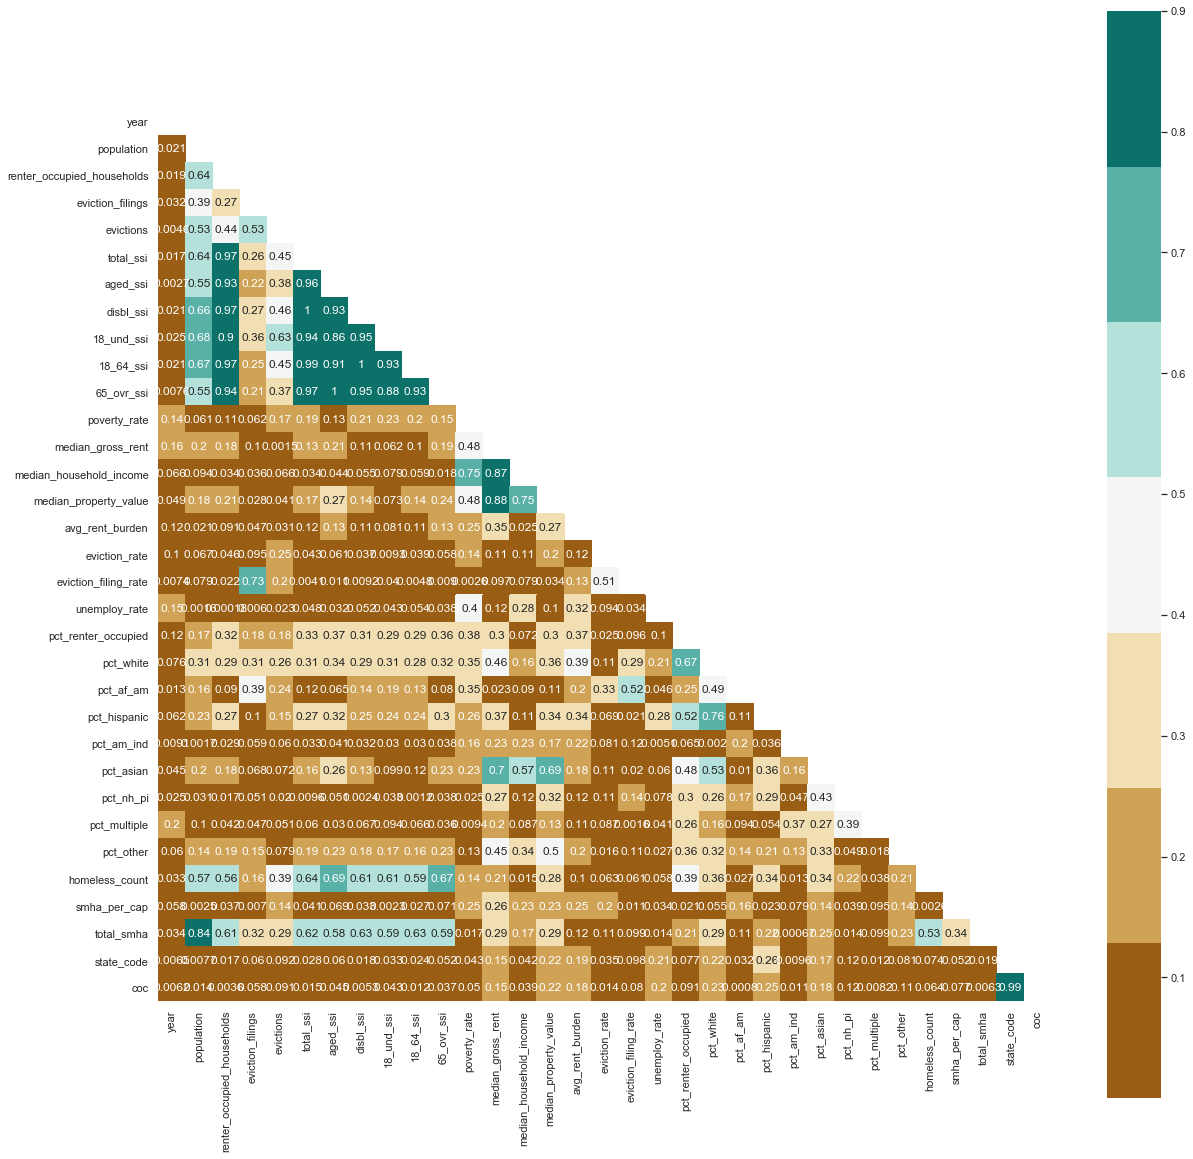

In [22]:
fig, ax = plt.subplots(figsize=(20,20))
corr = df.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, vmax=.9, square=True, cmap= sns.color_palette("BrBG", 7))

In [23]:
graphs1 =df[['homeless_count', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi']]

In [24]:
# graphs1 =df[['homeless_count_log', 'renter_occupied_households_log', 'eviction_filings_log',
#        'evictions_log', 'total_ssi_log', 'aged_ssi_log']]

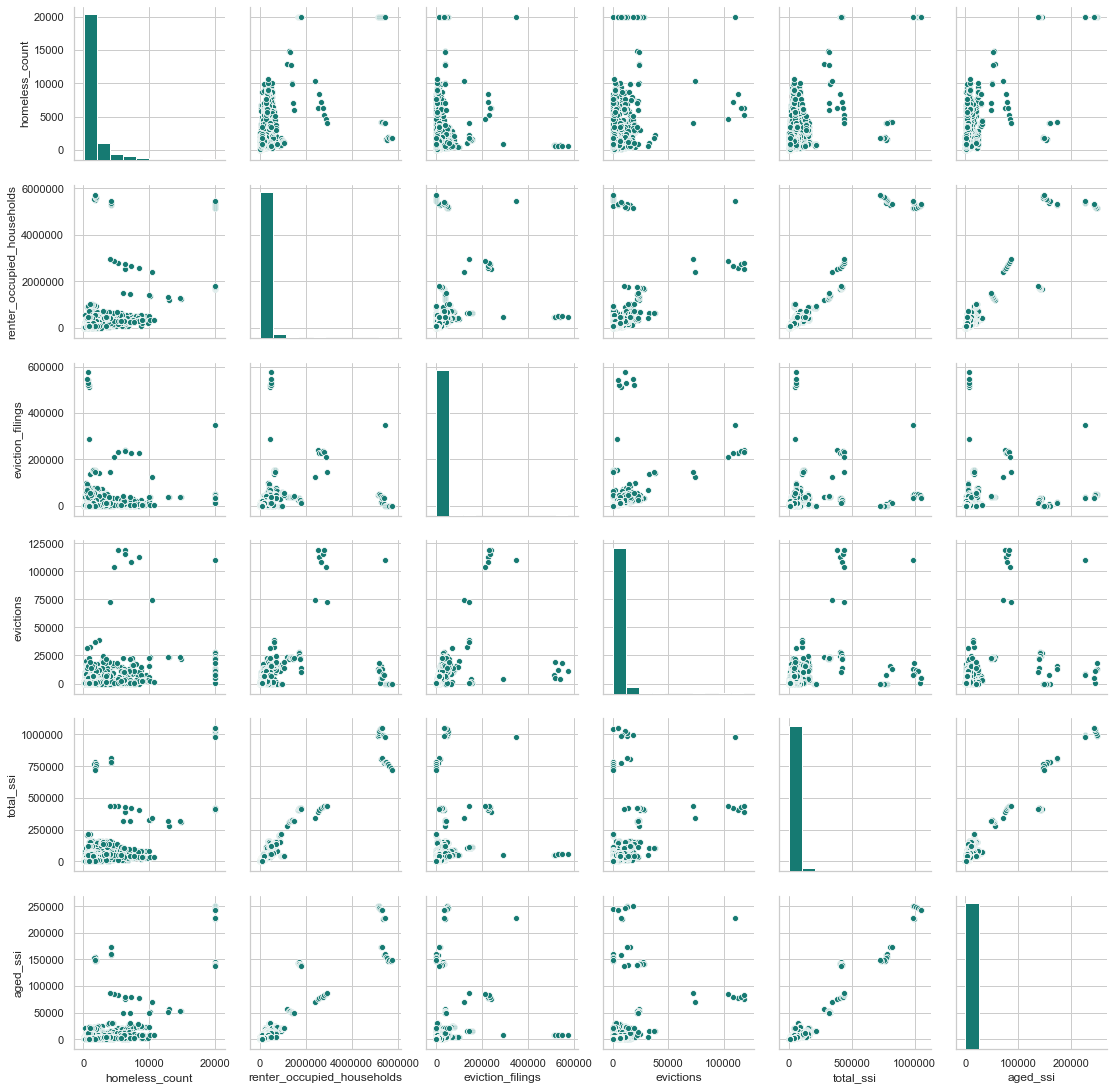

In [25]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs1)

In [26]:
graphs2 = df[['homeless_count','disbl_ssi', '18_und_ssi','18_64_ssi','65_ovr_ssi', 'poverty_rate']]


In [27]:
#graphs2 = df[['homeless_count_log','disbl_ssi_log', 'juvenile_ssi_log','adult_ssi_log','senior_ssi_log', 'poverty_rate_log']]


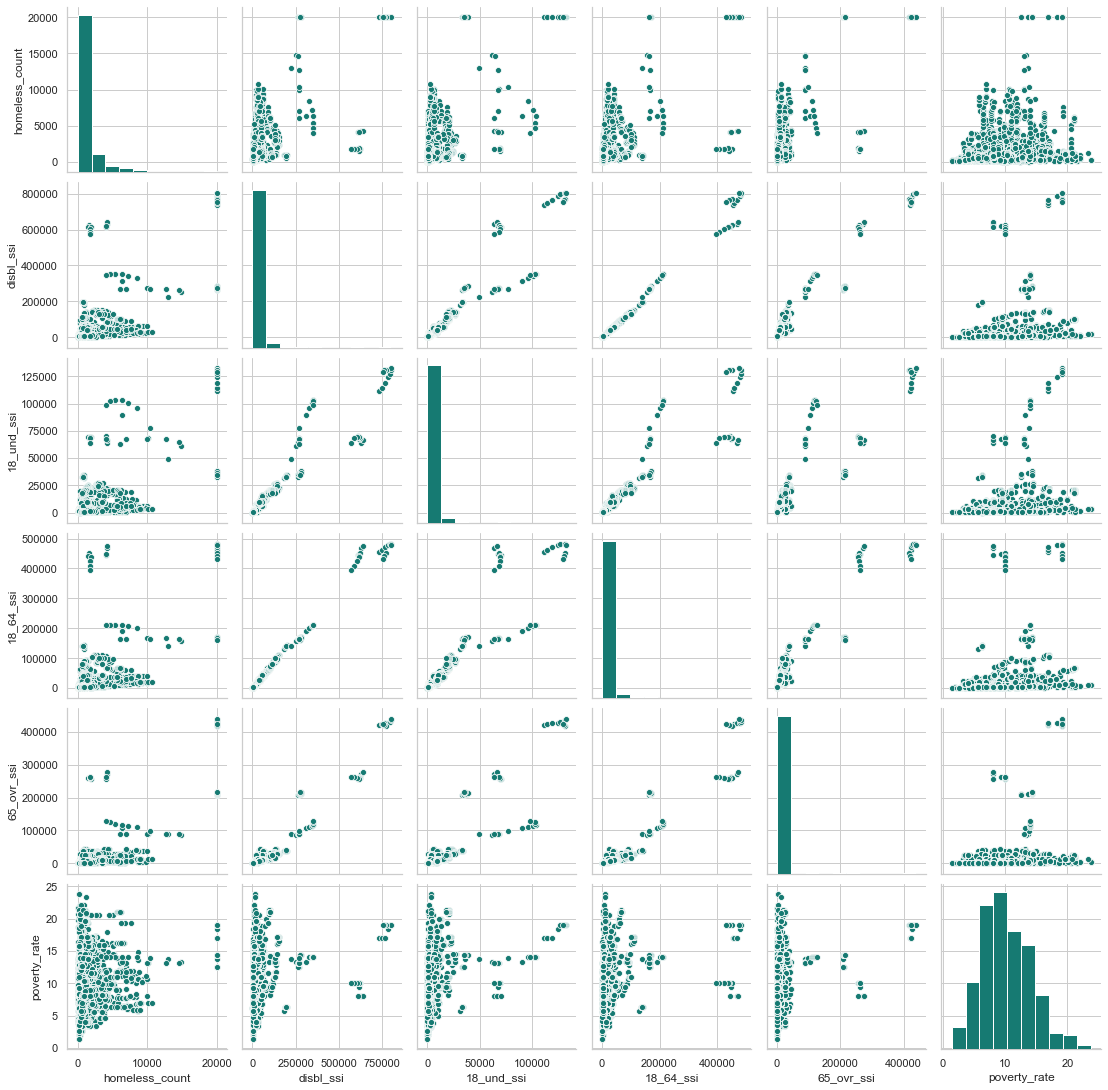

In [28]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs2)

In [29]:
graphs3 = df[['homeless_count','avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied']]

In [30]:
# graphs3 = df[['homeless_count_log','avg_rent_burden_log',
#        'eviction_rate_log', 'eviction_filing_rate_log', 'unemploy_rate_log',
#        'pct_renter_occupied_log']]

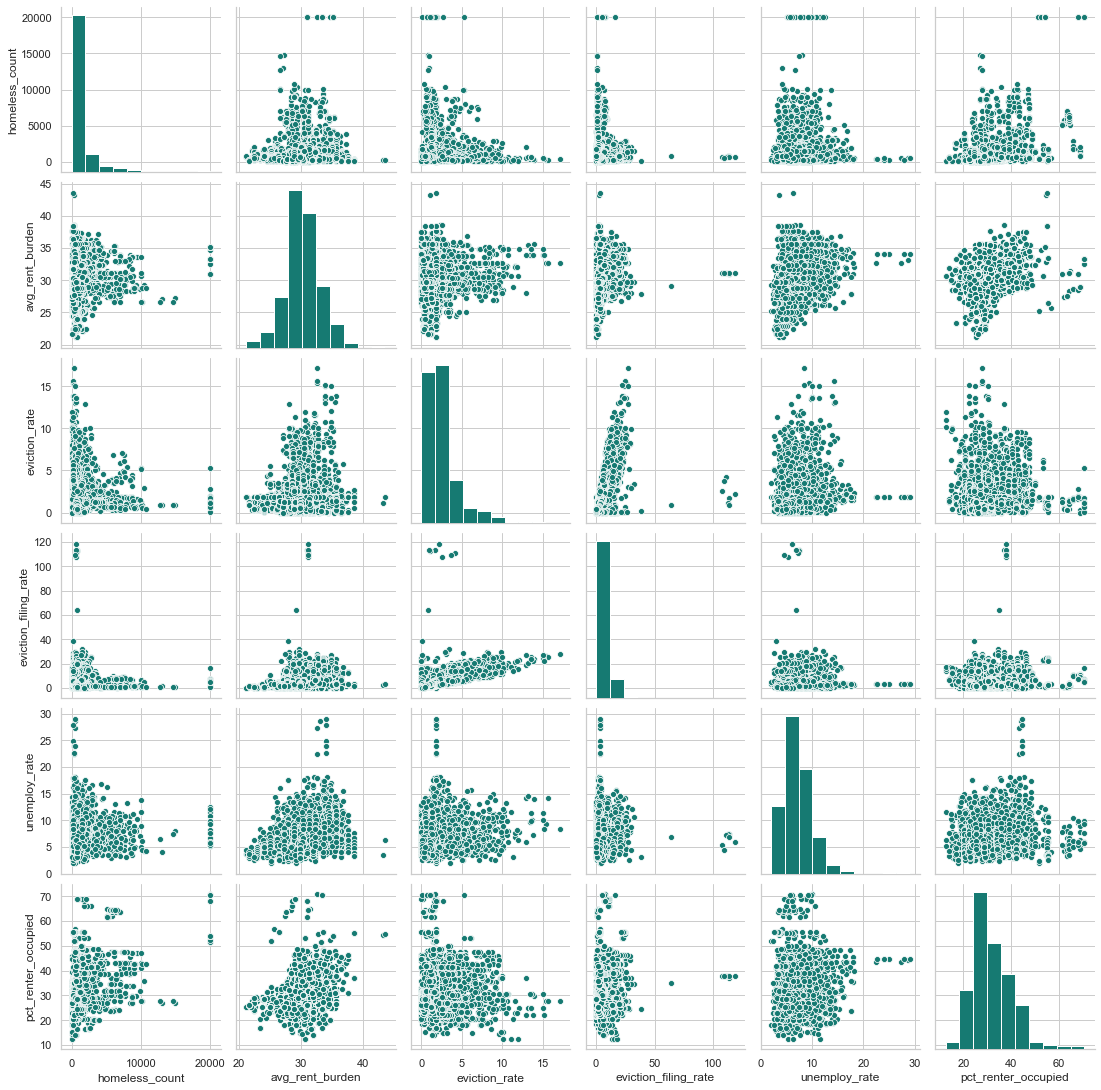

In [31]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs3)

In [33]:
graphs5 = df[['homeless_count', 'total_smha','smha_per_cap','median_household_income','population','median_gross_rent']]

In [34]:
#graphs5 = df[['homeless_count_log', 'total_smha_log','pc_smha_log','median_household_income_log','population_log','median_gross_rent_log']]

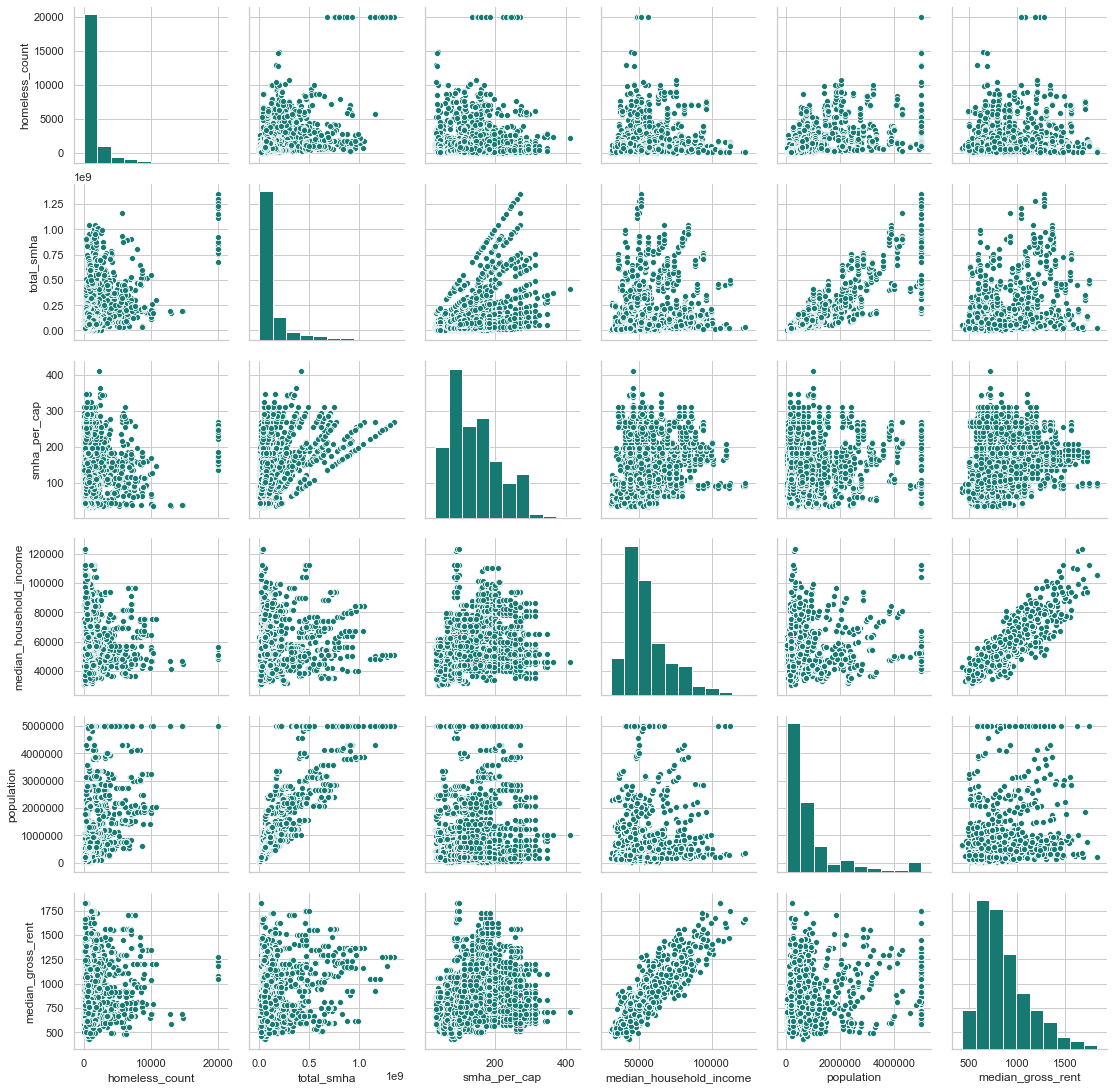

In [35]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs5)

In [36]:
df.rename({'18_und_ssi': 'juvenile_ssi', '18_64_ssi': 'adult_ssi',
           '65_ovr_ssi': 'senior_ssi'}, axis=1, inplace=True)

In [37]:
dfx = df.copy()

## OLS, Linear Regression Model

In [38]:
df.columns

Index(['year', 'population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi', 'poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'homeless_count', 'smha_per_cap', 'total_smha', 'state_code', 'coc'],
      dtype='object')

In [39]:
outcome = 'homeless_count'

cols = ['year', 'population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi', 'poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'smha_per_cap', 'total_smha', 'state_code', 'coc']

predictors = '+'.join(cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         homeless_count   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     239.0
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:47:54   Log-Likelihood:                -26855.
No. Observations:                3157   AIC:                         5.378e+04
Df Residuals:                    3124   BIC:                         5.398e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -2.489e+05   2.57e+05     -0.970      0.332   -7.52e+05    2.54e+05
year                         -25.8381      9.773     -2.644      0.008     -45.000      -6.677
population                     0.0010   6.51e-05     15.092      0.000       0.001       0.001
renter_occupied_households    -0.0041      0.000    -17.688      0.000      -0.005      -0.004
eviction_filings              -0.0156      0.002     -8.293      0.000      -0.019      -0.012
evictions                      0.0570      0.008      7.391      0.000       0.042       0.072
total_ssi                      2.0490      0.347      5.908      0.000       1.369       2.729
aged_ssi                       0.1418      0.070      2.018      0.044       0.004       0.280
disbl_ssi                      0.0725      0.070      1.030      0.303      -0.065       0.210
juvenile_ssi                  -2.0958      0.387     -5.413      0.000      -2.855      -1.337
adult_ssi                     -2.1388      0.385     -5.558      0.000      -2.893      -1.384
senior_ssi                    -2.0668      0.384     -5.384      0.000      -2.820      -1.314
poverty_rate                 -21.7129     14.616     -1.486      0.137     -50.371       6.945
median_gross_rent              1.9482      0.413      4.712      0.000       1.138       2.759
median_household_income       -0.0437      0.006     -7.102      0.000      -0.056      -0.032
median_property_value          0.0011      0.000      2.350      0.019       0.000       0.002
avg_rent_burden              -41.8377     12.713     -3.291      0.001     -66.765     -16.911
eviction_rate                -57.8226     18.424     -3.138      0.002     -93.948     -21.698
eviction_filing_rate          45.5072      8.372      5.436      0.000      29.093      61.922
unemploy_rate                  0.9761      9.667      0.101      0.920     -17.978      19.931
pct_renter_occupied           30.6856      5.068      6.055      0.000      20.749      40.622
pct_white                   3026.4639   2547.916      1.188      0.235   -1969.295    8022.222
pct_af_am                   3010.3244   2547.893      1.181      0.237   -1985.390    8006.038
pct_hispanic                3016.7929   2547.870      1.184      0.236   -1978.876    8012.462
pct_am_ind                  3031.8471   2547.747      1.190      0.234   -1963.580    8027.274
pct_asian                   3023.5091   2547.626      1.187      0.235   -1971.681    8018.699
pct_nh_pi                   4168.3409   2549.267      1.635      0.102    -830.067    9166.749
pct_multiple                3021.5859   2547.821      1.186      0.236   -1973.987    8017.159
pct_other                   3041.5131   2556.021      1.190      0.234   -1970.137    8053.163
smha_per_cap                  -1.2090      

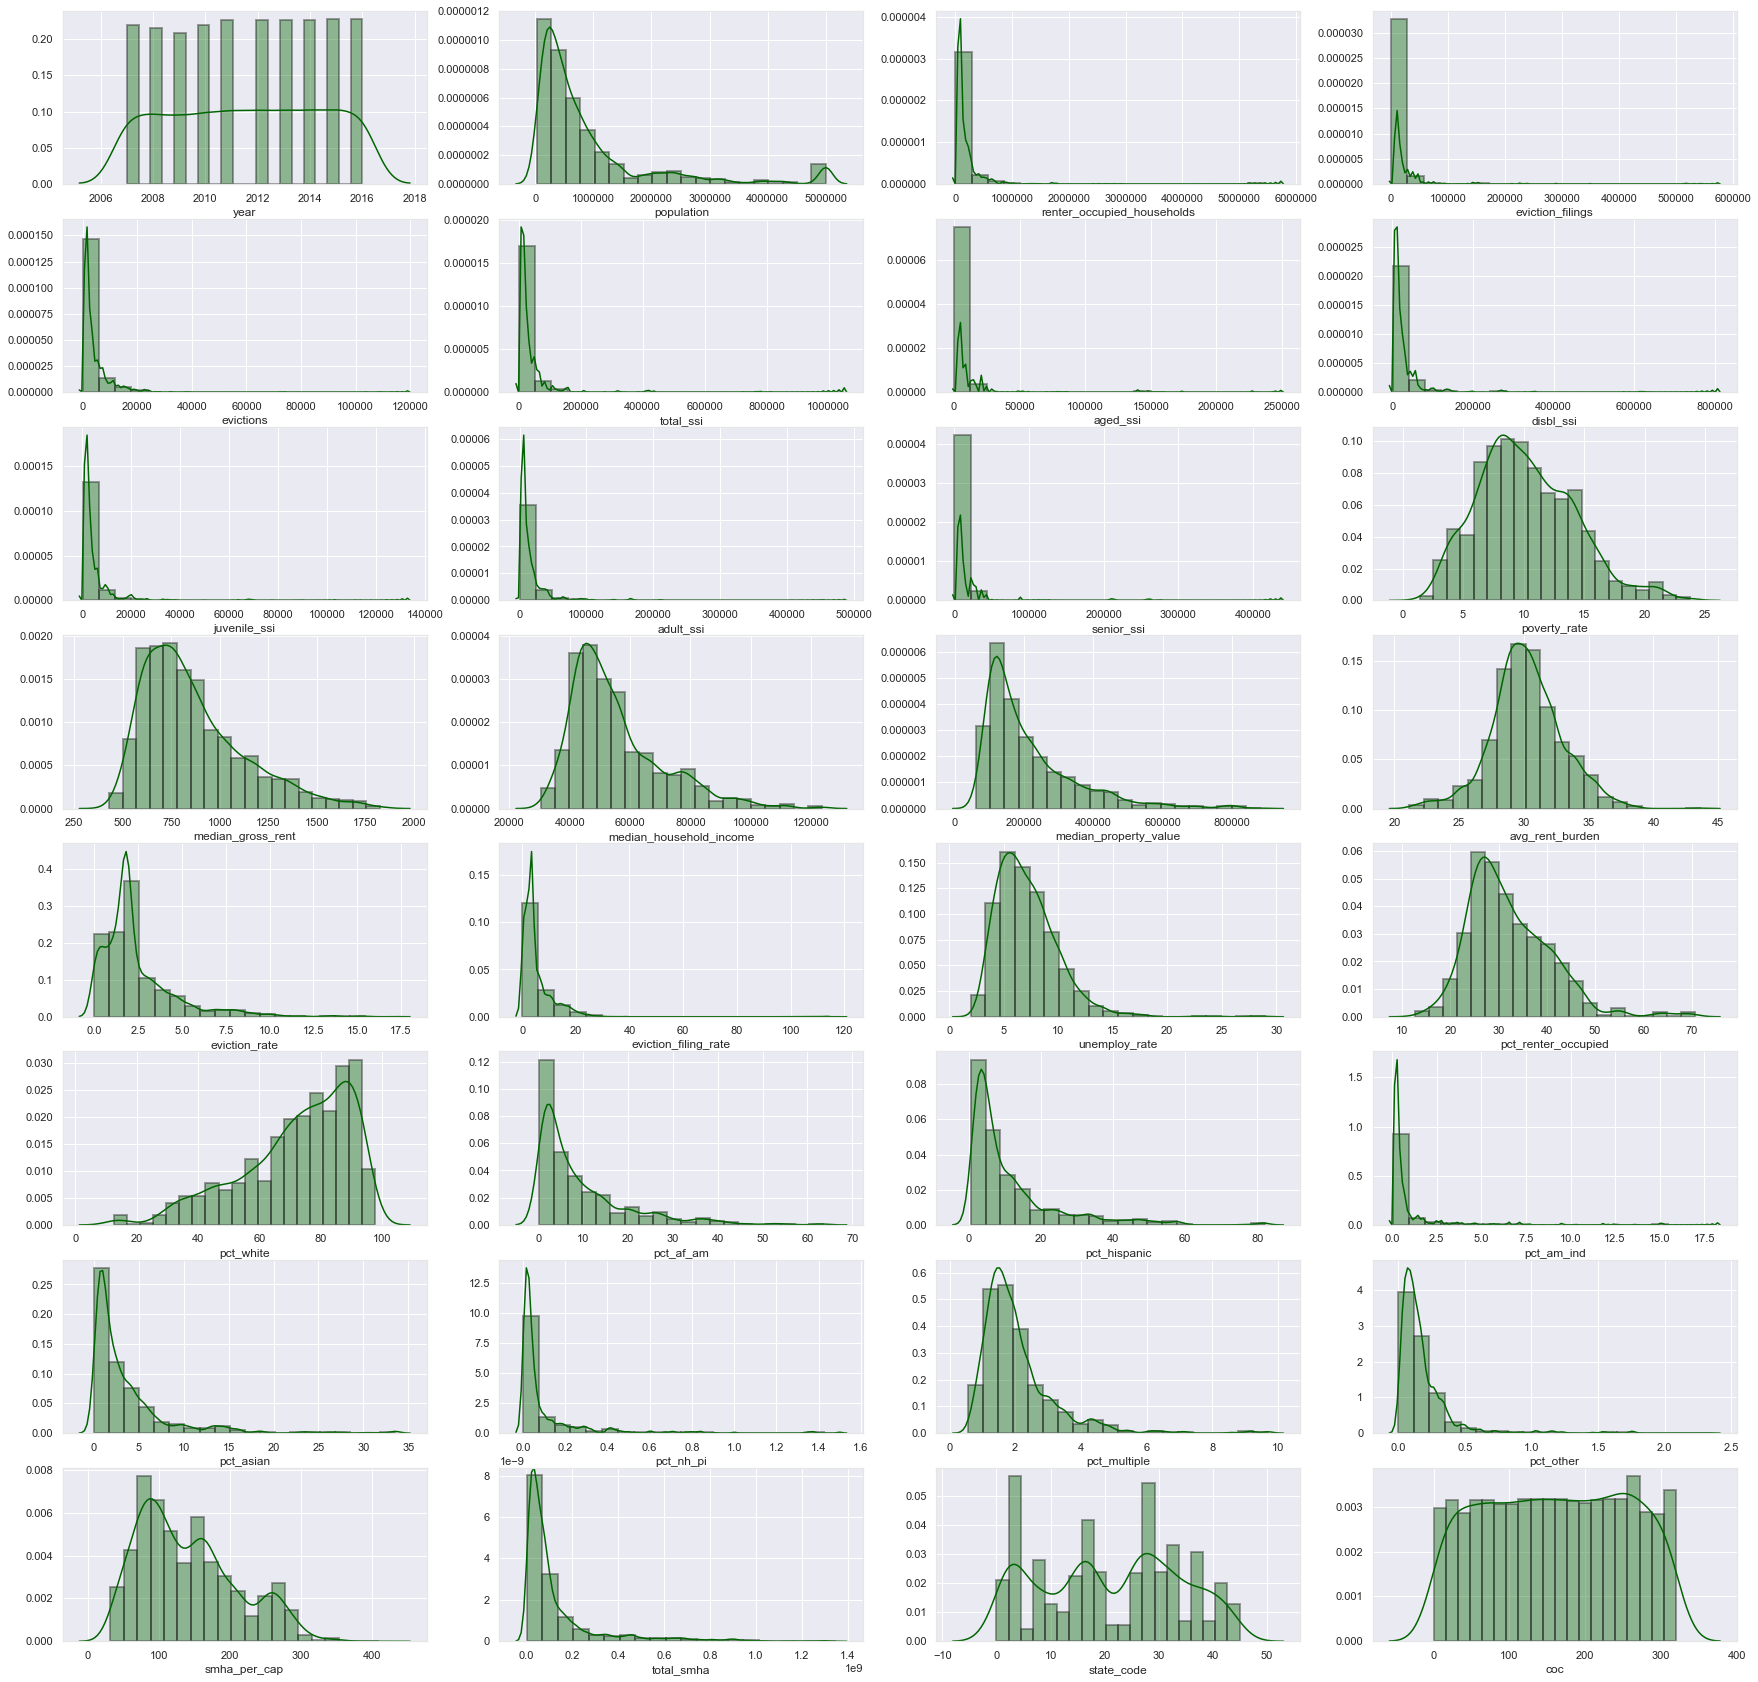

In [66]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(8,4,figsize = (30,30))
plt.rcParams["patch.force_edgecolor"] = True

col = ''
idx = 0
for i in range(0,9):
    for j in range(0,4):
    
        if idx < len(cols):
            col = cols[idx]
    
    
            position = ax[i][j]
            vis = sns.distplot(df[col],bins=20, color='darkgreen', 
                               hist_kws= dict(edgecolor="k", linewidth=2), ax=position)
        
            idx = idx + 1
    

### Review logged distributions

In [53]:
col = ['population', 'renter_occupied_households',
       'eviction_filings', 'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi',
       'juvenile_ssi', 'adult_ssi', 'senior_ssi', 'poverty_rate',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'avg_rent_burden', 'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'homeless_count', 'smha_per_cap', 'total_smha']

In [54]:
for c in col:
    name = c +"_log"
    df[name] = np.log(df[c])

In [55]:
#dfx.columns

In [56]:
log_cols = ['population_log',
       'renter_occupied_households_log', 'eviction_filings_log',
       'evictions_log', 'total_ssi_log', 'aged_ssi_log', 'disbl_ssi_log',
       'juvenile_ssi_log', 'adult_ssi_log', 'senior_ssi_log',
       'poverty_rate_log', 'median_gross_rent_log',
       'median_household_income_log', 'median_property_value_log',
       'avg_rent_burden_log', 'eviction_rate_log', 'eviction_filing_rate_log',
       'unemploy_rate_log', 'smha_per_cap_log', 'total_smha_log']

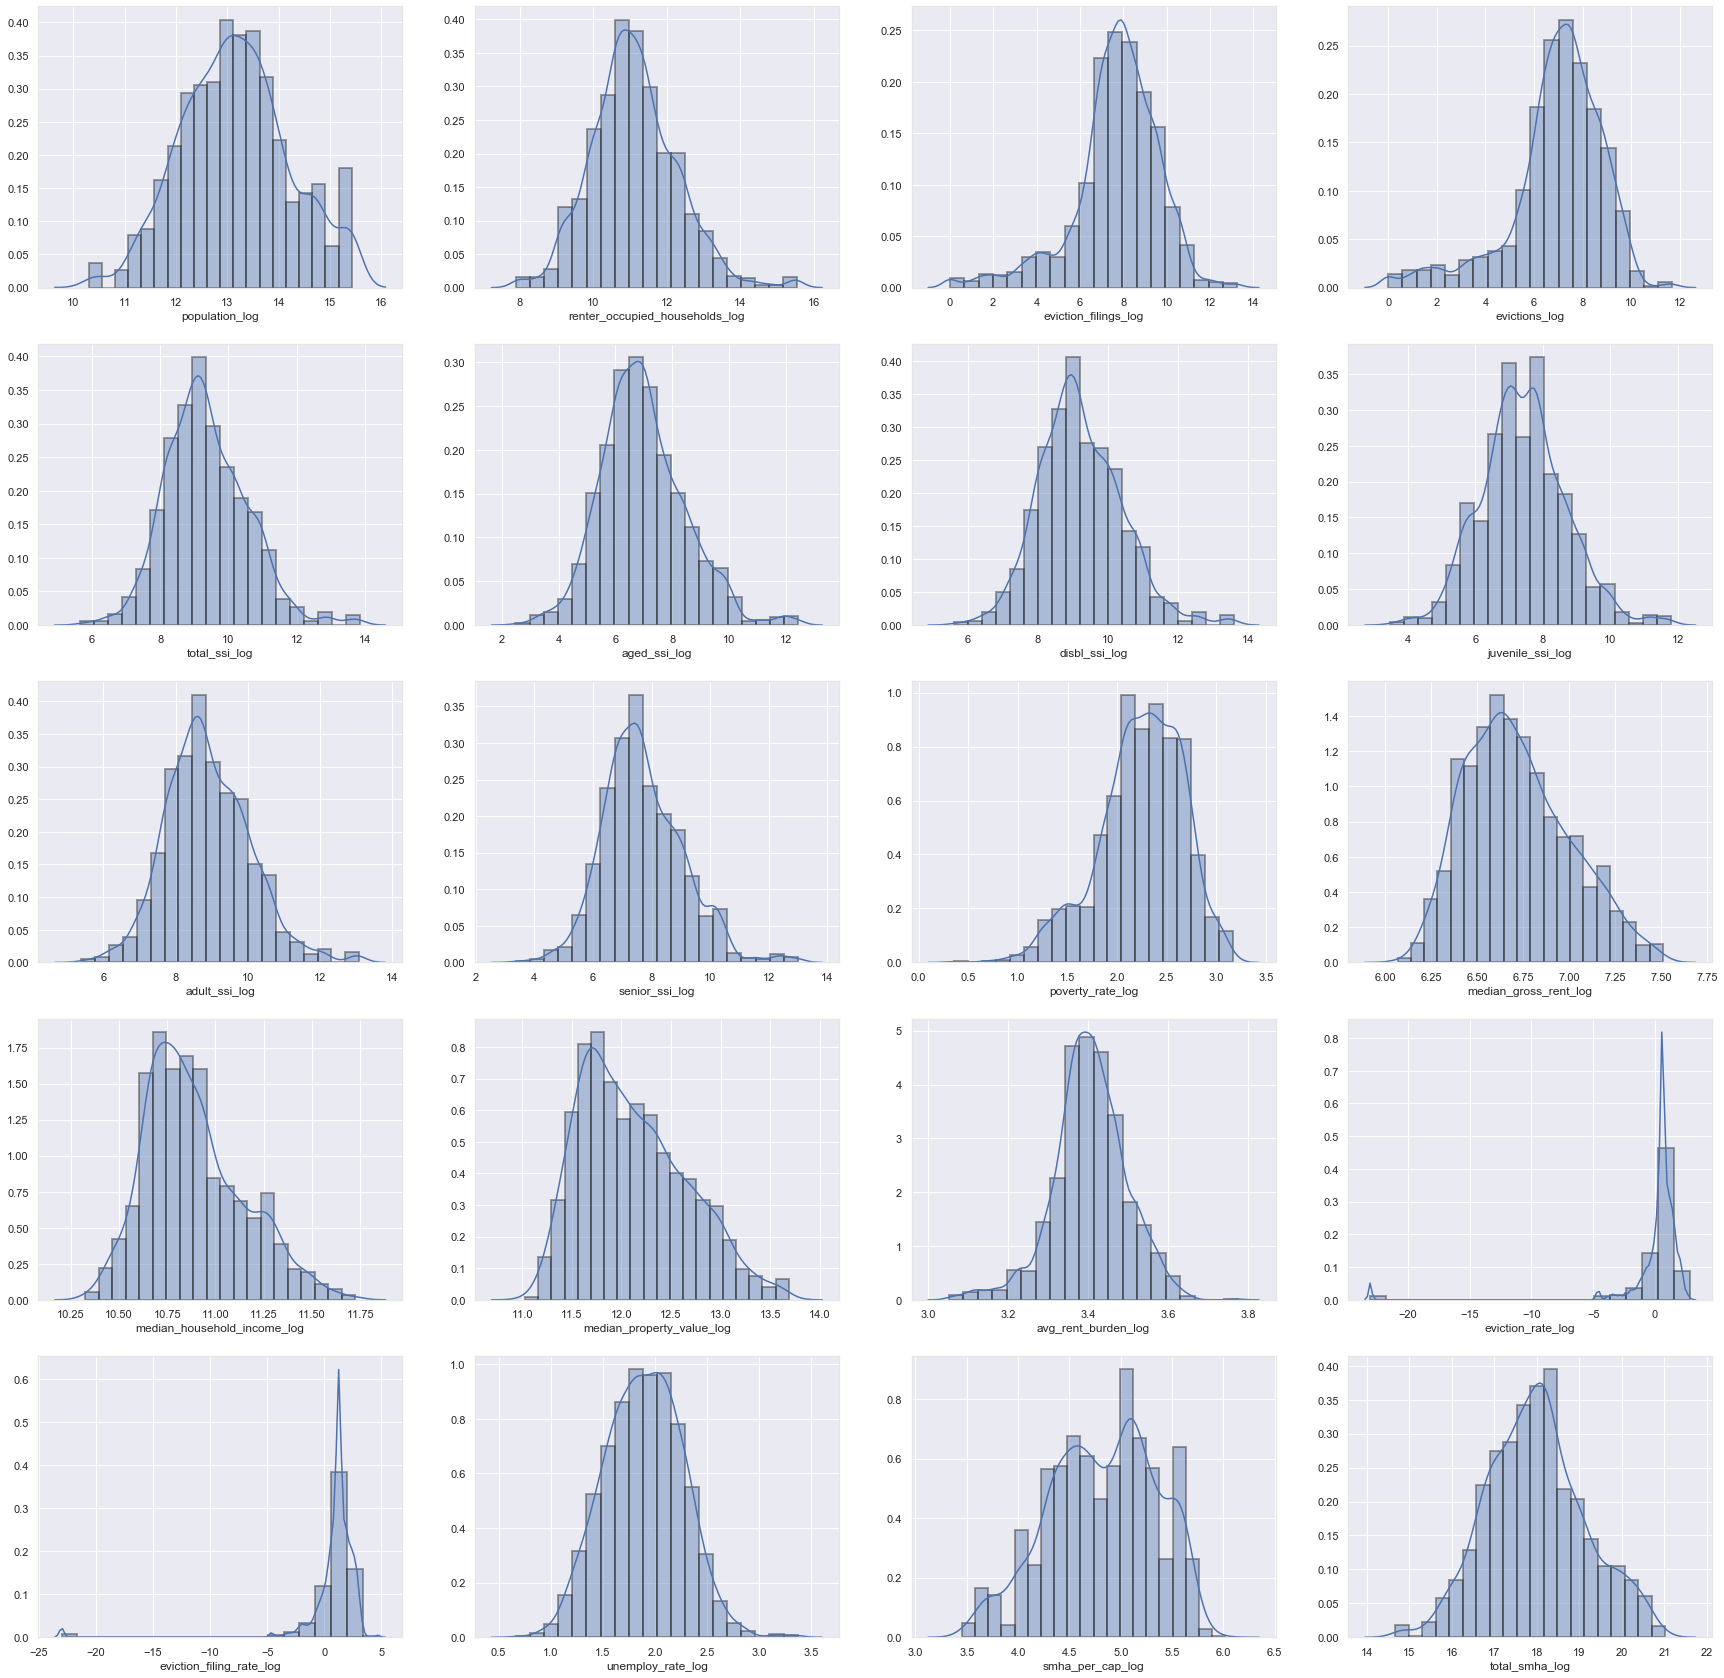

In [59]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(5,4,figsize = (30,30))
plt.rcParams["patch.force_edgecolor"] = True

c = ''
ix = 0
for i in range(0,5):
    for j in range(0,4):
    
        if ix < len(log_cols):
            c = log_cols[ix]
            position = ax[i][j]
            vis = sns.distplot((df[c][np.isfinite(df[c]) == True]), bins=20, color='b',hist_kws= dict(edgecolor="k", linewidth=2), ax=position) 
            ix = ix + 1
    

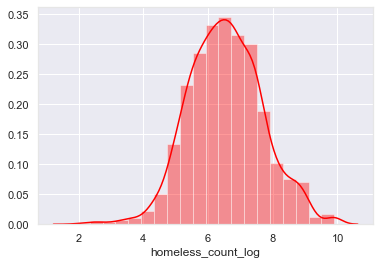

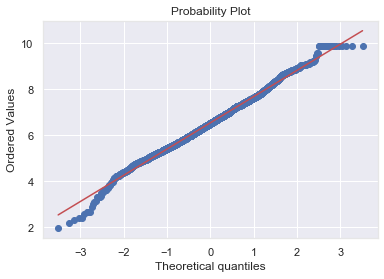

In [60]:
sns.distplot(df['homeless_count_log'],  bins=20, kde=True, color='red');
fig = plt.figure()
res = stats.probplot(df['homeless_count_log'], plot=plt) #outcome improved

In [61]:
df2 = df.copy()

In [63]:
df2.drop(['population', 'renter_occupied_households',
       'eviction_filings', 'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi',
       'juvenile_ssi', 'adult_ssi', 'senior_ssi', 'poverty_rate',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'avg_rent_burden', 'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'homeless_count', 'smha_per_cap', 'total_smha','pct_renter_occupied_log', 'pct_white_log',
       'pct_af_am_log', 'pct_hispanic_log', 'pct_am_ind_log', 'pct_asian_log',
       'pct_nh_pi_log', 'pct_multiple_log', 'pct_other_log','eviction_rate_log'], axis=1, inplace=True)

In [67]:
df2.columns

Index(['year', 'state_code', 'coc', 'population_log',
       'renter_occupied_households_log', 'eviction_filings_log',
       'evictions_log', 'total_ssi_log', 'aged_ssi_log', 'disbl_ssi_log',
       'juvenile_ssi_log', 'adult_ssi_log', 'senior_ssi_log',
       'poverty_rate_log', 'median_gross_rent_log',
       'median_household_income_log', 'median_property_value_log',
       'avg_rent_burden_log', 'eviction_filing_rate_log', 'unemploy_rate_log',
       'homeless_count_log', 'smha_per_cap_log', 'total_smha_log'],
      dtype='object')

In [68]:
def no_infinite(x):
    if x <= 0:
        x = 0.0000001
    return x

In [69]:
for col in df2.columns:
    df[col] = df[col].apply(lambda x: no_infinite(x))

### Liner Regression Model (with logged features)

In [71]:
outcome = 'homeless_count_log'

x_cols = ['population_log', 'renter_occupied_households_log',
       'eviction_filings_log', 'evictions_log', 'total_ssi_log',
       'aged_ssi_log', 'disbl_ssi_log', 'juvenile_ssi_log', 'adult_ssi_log',
       'senior_ssi_log', 'poverty_rate_log', 'median_gross_rent_log',
       'median_household_income_log', 'median_property_value_log',
       'avg_rent_burden_log', 'eviction_rate_log', 'eviction_filing_rate_log',
       'unemploy_rate_log', 'pct_renter_occupied_log', 'pct_white_log',
       'pct_af_am_log', 'pct_hispanic_log', 'pct_am_ind_log', 'pct_asian_log',
       'pct_nh_pi_log', 'pct_multiple_log', 'pct_other_log',
       'smha_per_cap_log', 'total_smha_log']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     homeless_count_log   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     175.5
Date:                Fri, 06 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:55:48   Log-Likelihood:                -3410.6
No. Observations:                3157   AIC:                             6879.
Df Residuals:                    3128   BIC:                             7055.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         11.4439      2.611      4.384      0.000       6.325      16.562
population_log                     0.3449      0.057      6.081      0.000       0.234       0.456
renter_occupied_households_log    -0.0782      0.090     -0.864      0.387      -0.256       0.099
eviction_filings_log              -0.0224      0.012     -1.943      0.052      -0.045       0.000
evictions_log                      0.0460      0.012      3.874      0.000       0.023       0.069
total_ssi_log                     -0.4391      0.350     -1.255      0.209      -1.125       0.247
aged_ssi_log                       0.2248      0.105      2.148      0.032       0.020       0.430
disbl_ssi_log                      1.3220      0.414      3.195      0.001       0.511       2.133
juvenile_ssi_log                  -0.3108      0.103     -3.026      0.003      -0.512      -0.109
adult_ssi_log                     -0.2615      0.332     -0.787      0.431      -0.913       0.390
senior_ssi_log                    -0.2155      0.188     -1.143      0.253      -0.585       0.154
poverty_rate_log                  -0.0786      0.106     -0.741      0.459      -0.287       0.130
median_gross_rent_log              0.4008      0.220      1.818      0.069      -0.031       0.833
median_household_income_log       -1.7476      0.256     -6.833      0.000      -2.249      -1.246
median_property_value_log          0.7169      0.081      8.820      0.000       0.558       0.876
avg_rent_burden_log               -1.5248      0.262     -5.830      0.000      -2.038      -1.012
eviction_rate_log                  0.0083      0.005      1.811      0.070      -0.001       0.017
eviction_filing_rate_log           0.1014      0.022      4.707      0.000       0.059       0.144
unemploy_rate_log                 -0.0327      0.043     -0.760      0.447      -0.117       0.052
pct_renter_occupied_log            0.2779      0.158      1.760      0.079      -0.032       0.588
pct_white_log                      0.0367      0.090      0.410      0.682      -0.139       0.212
pct_af_am_log                     -0.1012      0.020     -5.111      0.000      -0.140      -0.062
pct_hispanic_log                   0.0651      0.025      2.559      0.011       0.015       0.115
pct_am_ind_log                     0.0236      0.018      1.340      0.180      -0.011       0.058
pct_asian_log                      0.1219      0.032      3.790      0.000       0.059       0.185
pct_nh_pi_log                     -0.0030      0.003     -1.135      0.256      -0.008       0.002
pct_multiple_log                   0.0701      0.043      1.618      0.106      -0.015       0.155
pct_other_log                     -0.0171      0.007     -2.331      0.020      -0.031      -0.003
smha_per_cap_l

### Polynomial Features

In [72]:
poly_df = dfx.copy()
poly_df.drop(['year'],axis=1,inplace=True)
for col in poly_df.columns:
    poly_df[col] = poly_df[col].apply(lambda x: no_infinite(x))

In [73]:
#Train test split
target = poly_df['homeless_count']
features = poly_df.drop('homeless_count', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=27,test_size=0.2)

In [74]:
pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(X_train)
X_train_poly= pd.DataFrame(pf.transform(X_train), columns = pf.get_feature_names(features.columns))
X_test_poly= pd.DataFrame(pf.transform(X_test), columns = pf.get_feature_names(features.columns))

In [75]:
X_train_poly.head()

,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,disbl_ssi,juvenile_ssi,adult_ssi,senior_ssi,...,pct_other_log^2,pct_other_log homeless_count_log,pct_other_log smha_per_cap_log,pct_other_log total_smha_log,homeless_count_log^2,homeless_count_log smha_per_cap_log,homeless_count_log total_smha_log,smha_per_cap_log^2,smha_per_cap_log total_smha_log,total_smha_log^2
0,527411.0,81778.0,3.389000e+03,1.109000e+03,16819.0,1892.0,14927.0,2270.0,10477.0,4072.0,...,1.000000e-14,7.256297e-07,5.181109e-07,0.000002,52.653850,37.595668,133.202721,26.843892,95.108816,336.973743
1,179810.0,17004.0,9.160000e+02,7.300000e+02,4752.0,288.0,4464.0,818.0,3218.0,716.0,...,1.000000e-14,6.222576e-07,4.530554e-07,0.000002,38.720455,28.191720,103.482753,20.525923,75.344073,276.563898
2,224783.0,22463.0,4.600000e+01,2.100000e+01,3567.0,323.0,3117.0,548.0,2392.0,612.0,...,1.000000e-14,5.537334e-07,5.124856e-07,0.000002,30.662071,28.378043,96.614009,26.264154,89.417200,304.423883
3,946172.0,111405.0,1.000000e-07,1.000000e-07,11866.0,5388.0,6478.0,1010.0,4350.0,6506.0,...,1.000000e-14,7.037906e-07,5.034026e-07,0.000002,49.532120,35.429003,132.271854,25.341420,94.610526,353.222175
4,485998.0,68329.0,9.330000e+02,8.230000e+02,10251.0,2632.0,7619.0,1134.0,5155.0,3962.0,...,1.000000e-14,7.900637e-07,5.087596e-07,0.000002,62.420059,40.195250,143.645868,25.883636,92.500418,330.568983


In [76]:
print(X_train_poly.shape, y_train.shape)
print(X_test_poly.shape, y_test.shape)

(2525, 1952) (2525,)
(632, 1952) (632,)


### Linear Regression Model - Polynomial Features

In [159]:
lm = linear_model.LinearRegression() #Regression with Interaction Features

In [160]:
lm.fit(X_train_poly, y_train)
y_train_pred = lm.predict(X_train_poly)

In [161]:
print("R2: %.2f" % r2_score(y_train, y_train_pred)) 

R2: 0.99


In [162]:
y_test_pred = lm.predict(X_test_poly)

In [163]:
print("R2: %.2f" % r2_score(y_test, y_test_pred))

R2: -0.20


###  Logged Polynomial Features

In [82]:
log_poly_df = df2.copy()

In [83]:
log_poly_df.columns

Index(['year', 'state_code', 'coc', 'population_log',
       'renter_occupied_households_log', 'eviction_filings_log',
       'evictions_log', 'total_ssi_log', 'aged_ssi_log', 'disbl_ssi_log',
       'juvenile_ssi_log', 'adult_ssi_log', 'senior_ssi_log',
       'poverty_rate_log', 'median_gross_rent_log',
       'median_household_income_log', 'median_property_value_log',
       'avg_rent_burden_log', 'eviction_filing_rate_log', 'unemploy_rate_log',
       'homeless_count_log', 'smha_per_cap_log', 'total_smha_log'],
      dtype='object')

In [84]:
log_poly_df.drop(['year'],axis=1,inplace=True)
for col in log_poly_df.columns:
    log_poly_df[col] = log_poly_df[col].apply(lambda x: no_infinite(x))

In [85]:
#Train test split
target_1 = log_poly_df['homeless_count_log']
features_1 = log_poly_df.drop(['homeless_count_log'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(features_1, target_1, random_state=2,test_size=0.2)

In [86]:
pol = PolynomialFeatures(degree=2, include_bias=False)
pol.fit(Xtrain)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [87]:
Xtrain_log= pd.DataFrame(pol.transform(Xtrain), columns = pol.get_feature_names(features_1.columns))

In [88]:
Xtest_log= pd.DataFrame(pol.transform(Xtest), columns = pol.get_feature_names(features_1.columns))

In [89]:
print(Xtrain_log.shape, ytrain.shape)
print(Xtest_log.shape, ytest.shape)

(2525, 252) (2525,)
(632, 252) (632,)


### Linear Regression Model - Logged Polynomial Features

In [90]:
linreg = linear_model.LinearRegression()

In [91]:
linreg.fit(Xtrain_log, ytrain)
ytrain_pred = linreg.predict(Xtrain_log)

In [92]:
print("R2: %.2f" % r2_score(ytrain, ytrain_pred)) 

R2: 0.81


In [93]:
ytest_pred = linreg.predict(Xtest_log)

In [94]:
print("R2: %.2f" % r2_score(ytest, ytest_pred)) 

R2: 0.77


# Feature Selection

In [95]:
#Using Correlation Matrix to eliminate multicollinearity

In [96]:
corr_matrix = Xtrain_log.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [97]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [98]:
len(Xtrain_log.columns)

252

In [99]:
len(to_drop)

236

In [100]:
Xtrain_log.drop(to_drop, axis=1, inplace=True)

In [101]:
Xtest_log.drop(to_drop, axis=1, inplace=True)

In [102]:
Xtrain_log.shape

(2525, 16)

In [103]:
Xtrain_log.columns

Index(['state_code', 'population_log', 'eviction_filings_log',
       'poverty_rate_log', 'median_gross_rent_log',
       'median_household_income_log', 'avg_rent_burden_log',
       'eviction_filing_rate_log', 'unemploy_rate_log', 'smha_per_cap_log',
       'total_smha_log', 'state_code eviction_filings_log',
       'state_code eviction_filing_rate_log',
       'population_log smha_per_cap_log', 'poverty_rate_log unemploy_rate_log',
       'poverty_rate_log smha_per_cap_log'],
      dtype='object')

### Linear Regression - correlated features dropped

In [104]:
lm = linear_model.LinearRegression()

In [105]:
lm.fit(Xtrain_log, ytrain)

y_train_pred = lm.predict(Xtrain_log)


In [106]:
print("R2: %.2f" % r2_score(ytrain, y_train_pred))


R2: 0.55


In [107]:
#Scale and use regularization to eliminate features

In [108]:
def run_model(model,X_train,X_test,y_train,y_test):
    
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

In [109]:
scalar = StandardScaler()
scalar.fit(Xtrain_log)
X_train_scaled  = scalar.transform(Xtrain_log)
X_test_scaled = scalar.transform(Xtest_log)

### Lasso Regularization

In [110]:
lasso = LassoCV(max_iter=100,cv=10)
lasso.fit(X_train_scaled, ytrain)
run_model(lasso ,X_train_scaled, X_test_scaled, ytrain, ytest)
print("The optimal alpha for the Lasso Regression is: ",lasso.alpha_)

Training R^2 : 0.5463550499053096
Training Root Mean Square Error 0.7695988313417735

----------------

Testing R^2 : 0.5329631065872366
Testing Root Mean Square Error 0.7812249076380928
The optimal alpha for the Lasso Regression is:  0.0007604012204582324


In [111]:
coeff_used = np.sum(lasso.coef_!=0)
print("Number of coefs: ", len(lasso.coef_))
print("Number at 0: ", sum(abs(lasso.coef_) < 10**(-10)))
print("Number of coef used: ",coeff_used)
 

Number of coefs:  16
Number at 0:  0
Number of coef used:  16


In [112]:
cols = Xtrain_log.columns[(lasso.coef_ != 0).tolist()]

In [113]:
len(cols)

16

In [114]:
X_train_scaled = Xtrain_log[cols]
X_test_scaled = Xtest_log[cols]

In [115]:
X_train_scaled.shape

(2525, 16)

# Hyper Parameter Tuning and Model Selection

### Linear Regression Model - SKlearn

In [116]:
lin_reg = linear_model.LinearRegression()

In [117]:
lin_reg.fit(X_train_scaled,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
y_tr_pred = lin_reg.predict(X_train_scaled)

In [119]:
y_te_pred = lin_reg.predict(X_test_scaled)

In [120]:
print("R2: %.2f" % r2_score(ytrain, y_tr_pred))
print("MSE: %.2f" % mean_squared_error(ytrain, y_tr_pred))
print("MAE: %.2f" % metrics.mean_absolute_error(ytrain, y_tr_pred))
print('\n')
print("R2: %.2f" % r2_score(ytest, y_te_pred))
print("MSE: %.2f" % mean_squared_error(ytest, y_te_pred))
print("MAE: %.2f" % metrics.mean_absolute_error(ytest, y_te_pred))

R2: 0.55
MSE: 0.59
MAE: 0.59


R2: 0.54
MSE: 0.60
MAE: 0.59


###  Decision Tree Regression

In [121]:
regressor = DecisionTreeRegressor(random_state = 0)

In [122]:
regressor.fit(X_train_scaled, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [123]:
y_train_predict = regressor.predict(X_train_scaled)

In [124]:
print("R2: ", r2_score(ytrain, y_train_predict))  #overfitting

R2:  0.9999999999194605


In [125]:
print("MAE: ", metrics.mean_squared_error(ytrain, y_train_predict))

MAE:  1.0515295198729969e-10


In [126]:
#Regression Tree using Grid Search
parameters={ 'min_samples_leaf' : range(5,200,15), 'max_depth': range(2,20,2)}

In [127]:
reg_tree = DecisionTreeRegressor(random_state = 0)
grid_tree= GridSearchCV(reg_tree, parameters, cv=5)
grid_tree.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(5, 200, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       

In [128]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.8054422646790134
{'max_depth': 16, 'min_samples_leaf': 5}
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')


In [129]:
y_pred_tree = grid_tree.best_estimator_.predict(X_test_scaled)

In [130]:
print("r2_score:",metrics.r2_score(ytest, y_pred_tree))
print("MSE:",metrics.mean_squared_error(ytest, y_pred_tree))
print("MAE:",metrics.mean_absolute_error(ytest, y_pred_tree))

r2_score: 0.8516077277597437
MSE: 0.1939153814337318
MAE: 0.28640815348209214


### Random Forest Regressor

In [131]:
#Using Grid Search 
parameterz={'max_depth': range(2,20,2),'n_estimators': (10, 50, 100, 1000)}

In [132]:
reg_for = RandomForestRegressor(random_state = 0)

In [133]:
grid_forest = GridSearchCV(reg_for, parameterz, cv=5)

In [134]:
grid_forest.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [135]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

0.9063125891523777
{'max_depth': 18, 'n_estimators': 1000}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


In [136]:
y_pred_forest = grid_forest.best_estimator_.predict(X_test_scaled)

In [137]:
print("r2_score:",metrics.r2_score(ytest, y_pred_forest))

r2_score: 0.9305953908199563


In [138]:
#run model again with best parameters

In [141]:
r_forest = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [142]:
r_forest.fit(X_train_scaled, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [143]:
predict_train = r_forest.predict(X_train_scaled)

In [144]:
predict_forest = r_forest.predict(X_test_scaled)

In [145]:
print("r2_training_score:", metrics.r2_score(ytrain,predict_train))

r2_training_score: 0.9891909148088599


In [146]:
print("r2__validation_score:",metrics.r2_score(ytest, predict_forest))

r2__validation_score: 0.9305953908199563


In [147]:
print("MSE:",metrics.mean_squared_error(ytest, predict_forest))

MSE: 0.0906962408434376


In [148]:
print("MAE:",metrics.mean_absolute_error(ytest, predict_forest))

MAE: 0.21448851516925185


In [149]:
r_forest.feature_importances_

array([0.05400951, 0.52415892, 0.02747365, 0.03654249, 0.05020758,
       0.02697831, 0.04640343, 0.02819965, 0.00950779, 0.02763235,
       0.03728163, 0.03587328, 0.03705174, 0.01824295, 0.01006081,
       0.0303759 ])

In [150]:
feature_importances = pd.DataFrame(r_forest.feature_importances_, index = X_train_scaled.columns, columns=['importance']).sort_values('importance',ascending=False)

In [151]:
feature_importances[0:15]

,importance
population_log,0.524159
state_code,0.054010
median_gross_rent_log,0.050208
avg_rent_burden_log,0.046403
total_smha_log,0.037282
state_code eviction_filing_rate_log,0.037052
poverty_rate_log,0.036542
state_code eviction_filings_log,0.035873
poverty_rate_log smha_per_cap_log,0.030376
eviction_filing_rate_log,0.028200


### XGBoost with Regression

In [152]:
parameters_xgb = { 'max_depth':[ 3, 4, 5, 6, 8, 10, 12, 15],
   'gamma':[1.0],
   'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
   'subsample':[0.05], 'min_child_weight': [ 1, 3, 5, 7 ], 'n_jobs':[4]}

In [153]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

In [154]:
xgb_reg = GridSearchCV(xgb_model, parameters_xgb, cv=5)

In [155]:
xgb_reg.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=...bda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [1.0],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
               

In [156]:
print(xgb_reg.best_score_)
print(xgb_reg.best_params_)
print(xgb_reg.best_estimator_)

0.7053060052551879
{'gamma': 1.0, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 1, 'n_jobs': 4, 'subsample': 0.05}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)


In [157]:
y_pred_xgb = xgb_reg.best_estimator_.predict(X_test_scaled)

In [158]:
print("r2_score:",metrics.r2_score(ytest, y_pred_xgb))

r2_score: 0.7086496736859866


In [128]:
xgb_ = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)

In [129]:
xgb_.fit(X_train_scaled, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)

In [130]:
y_p = xgb_.predict(X_test_scaled)

In [131]:
print("r2_score:",metrics.r2_score(ytest, y_p))

r2_score: 0.6878037893843052


In [132]:
print("MSE:",metrics.mean_squared_error(ytest, y_p))

MSE: 0.3530775574406829


In [133]:
print("MAE:",metrics.mean_absolute_error(ytest, y_p))

MAE: 0.4594536421615142


## Next Steps

The final model will be random forest.